# Udacity Intro To Programming Stage 5 Project: Analyzing Titanic Data

By: Melissa Alegre

In [68]:
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

titanic_df = pd.read_csv('titanic_data.csv')

In [69]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [70]:
print titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


# Analysis

So, who survived the sinking of the Titanic? I decided to look at 3 categories from the Titanic data set: passenger gender, class, and age.  I chose these categories based in part from what I know of what happened, some of which was from the Leonardo diCaprio movie (and also Wikepedia).  I know that there were too few lifeboats for all the passengers so those that made it to the lifeboats were more likely to survive.  In the movie, these were mostly the women and children, so I chose to look at gender and age.  The movie also made it clear that it was difficult for those in the lower cabin class to get to the deck where the lifeboats were.  So, I also looked at passenger class.

# Gender and Passenger Class

First, I looked to see how many men and women survived. Then at how many in each passenger class (1st, 2nd, and 3rd) survived.

In [71]:
titanic_df.groupby(['Sex', 'Survived']).size().reset_index()

,Sex,Survived,0
0,female,0,81
1,female,1,233
2,male,0,468
3,male,1,109


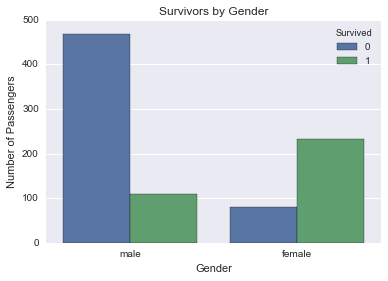

In [72]:
%matplotlib inline
import seaborn as sns
ax = sns.countplot(x="Sex", hue="Survived", data=titanic_df)
plt.title("Survivors by Gender")
plt.xlabel("Gender")
plt.ylabel("Number of Passengers")

In [73]:
titanic_df.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [74]:
titanic_df.groupby(['Pclass', 'Survived']).size().reset_index()

,Pclass,Survived,0
0,1,0,80
1,1,1,136
2,2,0,97
3,2,1,87
4,3,0,372
5,3,1,119


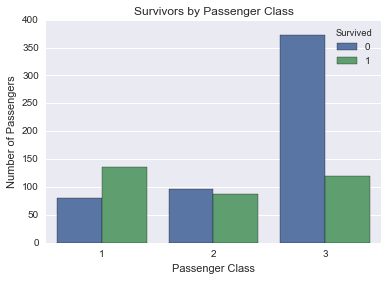

In [75]:
ax = sns.countplot(x="Pclass", hue="Survived", data=titanic_df)
plt.title("Survivors by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Number of Passengers")

In [76]:
titanic_df.groupby('Pclass')['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

The data shows that gender and passenger class correlated with survival. Most women (74%) survived while most men (81%) did not.  Also, passengers in 1st class had much higher survival rates (63%) than those in third class (24%).  Those in second class had less passengers who survived.

I thought it would be more interesting to look at both gender and passenger class together and see if there were any interesting survival trends.

GENDER AND PASSENGER CLASS ANALYZED TOGETHER

In [77]:
titanic_df['PassengerId'].count()

891

In [78]:
survivors = titanic_df['Survived'].sum()
print survivors

342


In [79]:
titanic_df.groupby(['Sex', 'Pclass'])['Survived'].mean().reset_index()

,Sex,Pclass,Survived
0,female,1,0.968085
1,female,2,0.921053
2,female,3,0.500000
3,male,1,0.368852
4,male,2,0.157407
5,male,3,0.135447


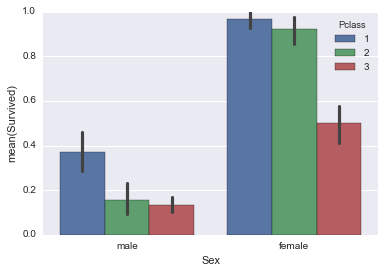

In [80]:
import seaborn as sns
ax = sns.barplot(x="Sex", y="Survived", hue="Pclass", data=titanic_df)

SUMMARY OF GENDER AND PASSENGER DATA RELATIVE TO SURVIVAL

The data above shows that most of the passsengers did not survive.  There were 342 survivors out of 891 total passengers. Gender seems to have had a greater impact on survival than passenger class, though both showed a clear correlation.

As in the previous grouping, this data shows more women than men survived.  And the survival rate went down with the passenger class so first class passengers had a higer rate of survival than third class passengers across gender lines.  In fact, 97% of the 1st class women passengers survived compared to only 50% of their 3rd class counterparts.  And even the women in the third class had a higher survival rate than the men of all passenger class.  The most unfortunate were the male passengers in the third class.  Only about 14% of them survived.

Looking at the second class passengers this way is also interesting compared to the first grouping when gender was not considered.  From the first Pclass grouping (without accounting for gender), the data shows that in this class, there were almost as many survivors as non-survivors (87 survived while 97 died).  However, when gender is taken into account, it is clear that gender had a big impact in survival rates as almost all the survivors were females (92% of females and only 16% of males in the 2nd class survived).

# Age

So, who were the passengers of the Titanic?  First, I decided to look at the age groups to get a better sense.  Some of the values in the Age column are NaN so, first, I excluded these.

In [81]:
titanic_df_age = titanic_df.dropna(subset=['Age'], how='any')
titanic_df_age

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S


In [82]:
titanic_df_age['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
6      54.0
7       2.0
8      27.0
9      14.0
10      4.0
11     58.0
12     20.0
13     39.0
14     14.0
15     55.0
16      2.0
18     31.0
20     35.0
21     34.0
22     15.0
23     28.0
24      8.0
25     38.0
27     19.0
30     40.0
33     66.0
34     28.0
35     42.0
37     21.0
38     18.0
       ... 
856    45.0
857    51.0
858    24.0
860    41.0
861    21.0
862    48.0
864    24.0
865    42.0
866    27.0
867    31.0
869     4.0
870    26.0
871    47.0
872    33.0
873    47.0
874    28.0
875    15.0
876    20.0
877    19.0
879    56.0
880    25.0
881    33.0
882    22.0
883    28.0
884    25.0
885    39.0
886    27.0
887    19.0
889    26.0
890    32.0
Name: Age, dtype: float64

In [83]:
titanic_df_age['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

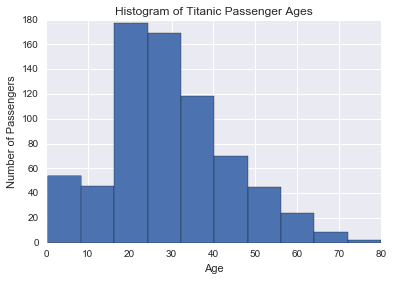

In [84]:
titanic_df_age['Age'].hist()
plt.xlabel("Age")
plt.ylabel("Number of Passengers")
plt.title("Histogram of Titanic Passenger Ages")

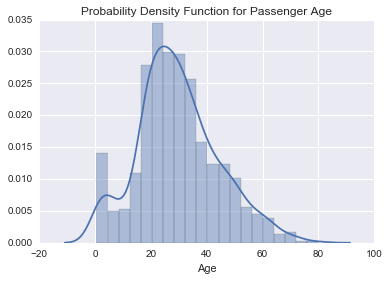

In [85]:
x = titanic_df_age['Age']
sns.distplot(x)
plt.title("Probability Density Function for Passenger Age")

SUMMARY OF AGE DATA FOR TITANIC PASSENGERS

The passengers range in age from about 5 months to 80 years, though there are a lot less seniors than small children. Most of the passengers are in the 18-45 years old range.  It would be interesting to see if the general population in this era would have a similar histogram. In addition to the matplotlib .hist histogram, I also generated a seaborn distplot which estimates the probability density function (pdf) over the age data.  This shows a normalized histogram and the estimated probability an age value falls into a certain range.

ANALYSIS OF CORRELATION OF AGE AND SURVIVAL

So, how did survival rates compare between adults and children?  I defined children as those passengers who are under 12 years old.  As for the adults, I grouped them by their ages after first creating a range of age groups to see if age correlated with survival.  The final grouping was done by trial and error.  I tried to avoid creating groups that were too small or too big so as not to skew the analysis.  Finally, I added a new column, age_range, to reflect the age groups I had created.

In [86]:
def convert_age(age):
    if age >= 55:
        age = '55+'
    elif age >= 45:
        age = '45-54'
    elif age >= 40:
        age = '40-44'
    elif age >= 35:
        age = '35-39'
    elif age >= 30:
        age = '30-34'
    elif age >= 25:
        age = '25-29'
    elif age >= 18:
        age = '18-24'
    elif age >= 12:
        age = '12-17'
    else:
        age = '<12'
        
    return age

The line below is just for testing the conversion function.  I tried different values to make sure it worked.

In [87]:
convert_age(15)

'12-17'

In [88]:
def convert_ages(ages):
    return ages.apply(convert_age)

In [89]:
age_range = convert_ages(titanic_df_age['Age'])

In [90]:
age_range

0      18-24
1      35-39
2      25-29
3      35-39
4      35-39
6      45-54
7        <12
8      25-29
9      12-17
10       <12
11       55+
12     18-24
13     35-39
14     12-17
15       55+
16       <12
18     30-34
20     35-39
21     30-34
22     12-17
23     25-29
24       <12
25     35-39
27     18-24
30     40-44
33       55+
34     25-29
35     40-44
37     18-24
38     18-24
       ...  
856    45-54
857    45-54
858    18-24
860    40-44
861    18-24
862    45-54
864    18-24
865    40-44
866    25-29
867    30-34
869      <12
870    25-29
871    45-54
872    30-34
873    45-54
874    25-29
875    12-17
876    18-24
877    18-24
879      55+
880    25-29
881    30-34
882    18-24
883    25-29
884    25-29
885    35-39
886    25-29
887    18-24
889    25-29
890    30-34
Name: Age, dtype: object

In [91]:
titanic_df_age = titanic_df_age.assign(age_range=age_range.values)

In [92]:
titanic_df_age

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_range
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,18-24
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,35-39
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,25-29
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35-39
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35-39
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,45-54
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,<12
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,25-29
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,12-17
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,<12


In [93]:
titanic_df_age.groupby('age_range').size()

age_range
12-17     45
18-24    165
25-29    106
30-34     95
35-39     72
40-44     48
45-54     73
55+       42
<12       68
dtype: int64

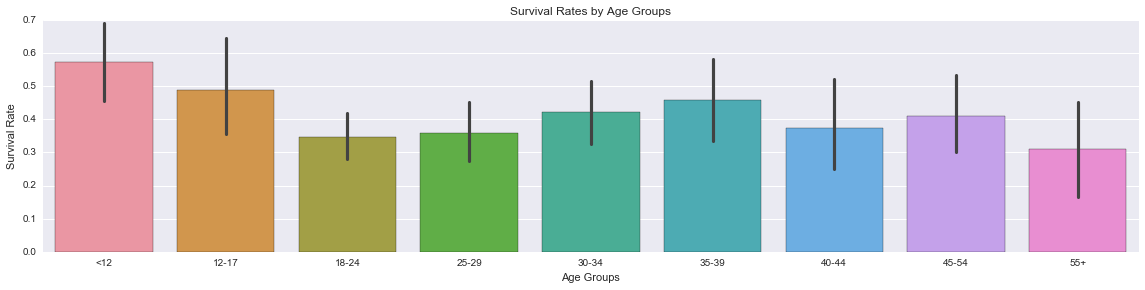

In [94]:
sns.factorplot(x="age_range", y="Survived", data=titanic_df_age, kind='bar',
              order=["<12", "12-17", "18-24", "25-29", "30-34", "35-39", "40-44", "45-54", "55+"], 
               aspect = 4)
plt.ylabel("Survival Rate")
plt.xlabel("Age Groups")
plt.title("Survival Rates by Age Groups")
plt.show()

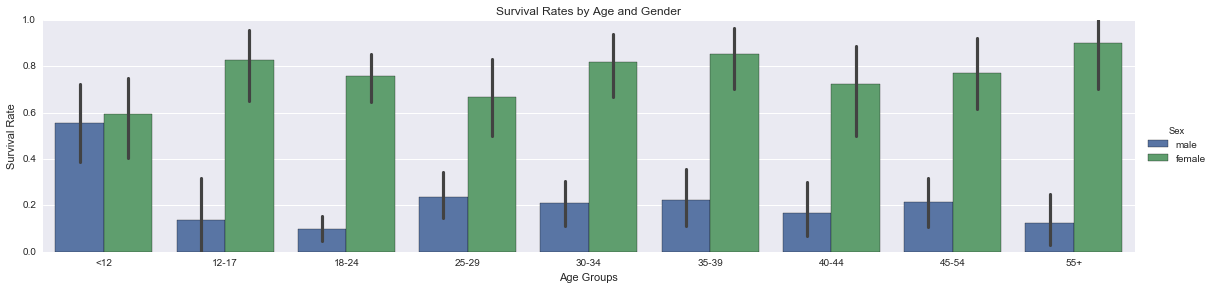

In [95]:
sns.factorplot(x="age_range", y="Survived", hue="Sex", data=titanic_df_age, kind='bar',
              order=["<12", "12-17", "18-24", "25-29", "30-34", "35-39", "40-44", "45-54", "55+"], 
               aspect = 4)
plt.ylabel("Survival Rate")
plt.xlabel("Age Groups")
plt.title("Survival Rates by Age and Gender")
plt.show()

In [96]:
titanic_df_age.groupby('Sex')['Survived'].mean()

Sex
female    0.754789
male      0.205298
Name: Survived, dtype: float64

SUMMARY OF AGE DATA RELATIVE TO SURVIVAL

The above bar graphs show that, generally speaking, most women and children survived while most adult men did not.  Children had higher survival rates than adults of all age ranges.  Of the adults that did survive, women had much greater survival rates than men, by several factors, in all age groups.

# SOME LIMITATIONS ON THE DATA ANALYZED

1.  The Titanic data set I analyzed from Kaggle contains passenger information on a subset of passengers.  Specifically, the data includes only about 40% of the total passengers.  It could probably be assumed that the data  used is a good representation of the entire population of the Titanic passenger given the nature of the competition sponsored by Kaggle.  However, this was not explicitly stated.  To the extent this analysis is ever used to make definitive conclusions regarding the Titanic passengers, this limitation should be well noted.  In at least one instance, the analysis here is not quite in complete agreement with publicly available data on a larger population set of the Titanic passengers.  The Wikepedia entry for RMS Titanic indicates (in the table in the Survivors and Victims subsection) that more men (92%) in the second passenger class perished compared to those in the 3rd class (84%).

2.  The Titanic data I analyzed contained several missing values.  For the purposes of my analysis, the most significant of these were missing age values for some passengers.  I chose to exclude these entries in their entirety in the portion of my analysis related to age, but I did include them when I analyzed for gender and passenger class correlation.  The obvious advantage to excluding this data is ease of analysis.  It would be difficult to make predictions or impute what values the missing ages should be.  In the best case scenario, the missing data is randomized such that none of the age groups I created are more impacted than the others, but there really is no evidence that this is the case.  It's also not clear to me in this case whether omission or imputation would introduce a greater bias, though it is almost likely that some bias will be introduced regardless of how the missing data is handled. In all, I ended up exlcluding 177 entries because of missing age data.  This represents nearly 20% of the total entries.  By excluding such a large number, I significantly reduce my sample size and likely increase errors in the analysis.

# REFERENCES

Wikepdia entry on RMS Titanic at https://en.wikipedia.org/wiki/RMS_Titanic#Survivors_and_victims

Kaggle site describing data source https://www.kaggle.com/c/titanic/data

Udacity forums, especially those related to making plots and graphs

Seaborn documentation at https://stanford.edu/~mwaskom/software/seaborn/index.html

stackoverflow.com 